## Principle Component Analysis
PCA is used for feature reduction. Also, useful for visualization or getting slow running algorithms a smaller dataset to work on. Considered *unsupervised* as there is no labelled data to train from.

Remember to standardize the data before running PCA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)

In [2]:
iris = datasets.load_iris()
target = pd.Series(iris.target)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = target


In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
# 4 columns of data (cm), going to use PCA
# with 4 columns of result.
# The explained_variance_ratio_ tells us that
# by using 1 principal component, we will get
# 73% of the variance
X = iris_df.iloc[:, :4]
X_s = preprocessing.StandardScaler().fit_transform(X)
pca4 = decomposition.PCA(n_components=None)
res4 = pca4.fit_transform(X_s)
pca4.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

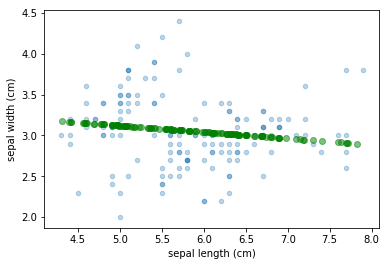

In [5]:
# 1D visualization of PCA
# (first 2 columns of iris)
xy = dict(zip('xy', iris_df.columns[:2]))
X = iris_df.iloc[:,:2]
X.plot(kind='scatter', **xy, alpha=.3)
pca1 = decomposition.PCA(n_components=1)
res = pca1.fit_transform(X)
flat = pca1.inverse_transform(res)
plt.scatter(flat[:, 0], flat[:, 1], c='g', alpha=.5)

In [6]:
# explained variance - How much of the variance is explained by 
# each of the principal components
pca1.explained_variance_ratio_

array([ 0.78834238])

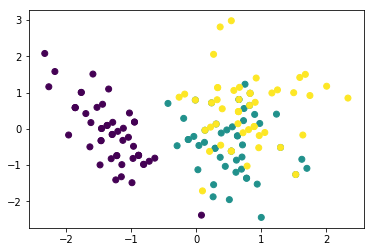

In [7]:
# PCA with 2 Dimensions
X_s = preprocessing.StandardScaler().fit_transform(X)
pca2 = decomposition.PCA(n_components=2)
res2 = pca2.fit_transform(X_s)
plt.scatter(res2[:, 0], res2[:, 1], c=iris_df.target)

In [8]:
pca2.explained_variance_ratio_

array([ 0.55468462,  0.44531538])

## Exercise: PCA

The (wheat) seed dataset has a feature engineered column, compactness
\begin{align}
C=4*pi*area/perimeter^2
\end{align}

* Run PCA on this data set to create 2 components. (Ignore variety)
* Visualize the results

The file is at ``../data/seeds_dataset.txt``


It has the following fields:

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
8. variety (Kama, Rosa, Canadian)

https://archive.ics.uci.edu/ml/datasets/seeds




## Classification with PCA

In [9]:
# random forest on all data
X = iris_df.iloc[:, :4]
y = iris_df.target
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X, y, test_size=.3, random_state=42)
rf1 = ensemble.RandomForestClassifier()
rf1.fit(X_train, y_train)
rf1.score(X_test, y_test)

1.0

In [10]:
# random forest on PCA data

X = iris_df.iloc[:, :4]
y = iris_df.target
X_s = preprocessing.StandardScaler().fit_transform(X)
pca2 = decomposition.PCA(n_components=2)
X = pca2.fit_transform(X_s)
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X, y, test_size=.3, random_state=42)
rf2 = ensemble.RandomForestClassifier()
rf2.fit(X_train, y_train)
rf2.score(X_test, y_test)

0.93333333333333335

In [11]:

def fig_with_title(ax, title, figkwargs):
    if figkwargs is None:
        figkwargs = {}
    if not ax:
        fig = plt.figure(**figkwargs)
        ax = plt.subplot(111)
    else:
        fig = plt.gcf()
    if title:
        ax.set_title(title)
    return fig, ax


def plot_confusion_matrix(clf, X, y, labels, random_state=42, annotate=True,
                          cmap=plt.cm.Blues,
                          title="Confusion Matrix", ax=None, figkwargs=None):
    fig, ax = fig_with_title(ax, title, figkwargs)
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y, y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(im)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    if annotate:
        for x in range(len(labels)):
            for y in range(len(labels)):
                plt.annotate(str(cm[x][y]),
                             xy=(y,x),
                             ha='center',va='center',color='red', fontsize=25, fontstyle='oblique')

    return fig, ax

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

(<matplotlib.figure.Figure at 0x1b4cb3947b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b4cb8ac828>)

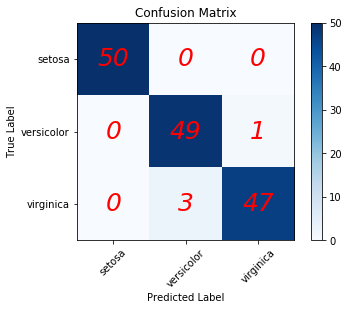

In [13]:
plot_confusion_matrix(rf2, X, y, labels=iris.target_names)

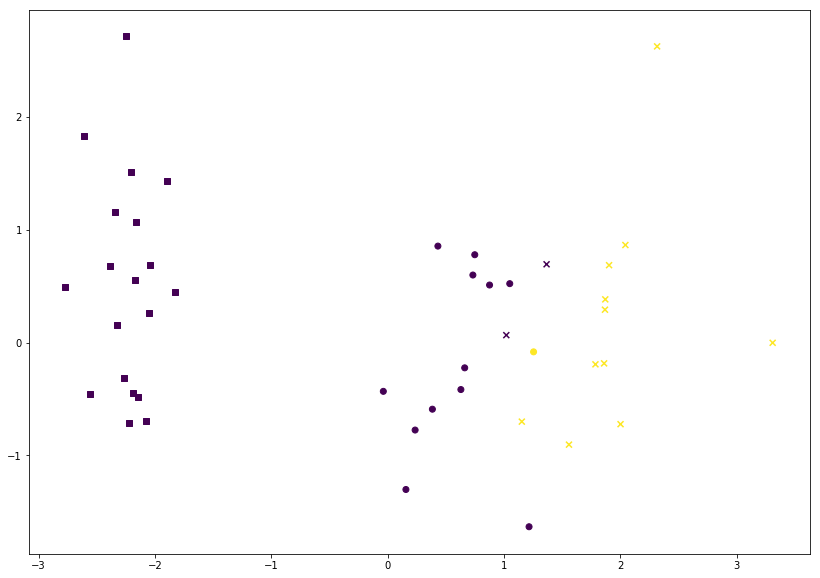

In [14]:
# Plot 2d PCA
# Color by random forest prediction
# Shape is actual species
pred = rf2.predict(X_test)
shapes = 'sox'
colors = 'rgb'
shape = [shapes[i] for i in y_test]
fig = plt.figure(figsize=(14,10))
for actual in range(3):
    mask = y_test==actual
    xs = X_test[mask]
    shape = shapes[actual]
    plt.scatter(xs[:,0], xs[:,1], c=pred[mask], marker=shape)

## Exercise: Classification with PCA
* Run a classification on PCA'd data
* How does it perform versus the raw data?